# This note book explains everything needed for the first course 

## mean, Standard deviation, covariance, correlation

In [25]:
rdd= sc.parallelize(range(100))
rdd1= sc.parallelize(range(-200,-10))

## Sum and Count and average

In [10]:

rdd_sum = rdd.sum()
n = rdd.count()

In [11]:
avg= rdd_sum/n

## filtering method

In [66]:
rdd.filter(lambda x : x > 5 and x < 20).collect()

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

## sort, index,lookup, replacing (key,valu) to (value,key) and etc.

In [27]:
rdd1.sortBy(lambda x : x).take(10)

[-200, -199, -198, -197, -196, -195, -194, -193, -192, -191]

In [76]:
newrdd = rdd.map(lambda x: -x).zipWithIndex().map(lambda a:(a[1], a[0]))

In [78]:
index=10
newrdd.lookup(index)

[-10]

In [42]:
rdd.map(lambda x: -x).take(10)

[0, -1, -2, -3, -4, -5, -6, -7, -8, -9]

In [46]:
rdd1.zipWithIndex()

PythonRDD[67] at RDD at PythonRDD.scala:52

In [47]:
type(rdd1.zipWithIndex())

pyspark.rdd.PipelinedRDD

In [79]:
rdd1.sortBy(lambda x : x).zipWithIndex().map(lambda a : (a[1],a[0])).take(10)

[(0, -200),
 (1, -199),
 (2, -198),
 (3, -197),
 (4, -196),
 (5, -195),
 (6, -194),
 (7, -193),
 (8, -192),
 (9, -191)]

# Assignment 4

Welcome to Assignment 4. This will be the most fun. Now we will prepare data for plotting.

Just make sure you hit the play button on each cell from top to down. There are three functions you have to implement. Please also make sure than on each change on a function you hit the play button again on the corresponding cell to make it available to the rest of this notebook. Please also make sure to only implement the function bodies and DON'T add any additional code outside functions since this might confuse the autograder.

So the function below is used to make it easy for you to create a data frame from a cloudant data frame using the so called "DataSource" which is some sort of a plugin which allows ApacheSpark to use different data sources.


Sampling is one of the most important things when it comes to visualization because often the data set gets so huge that you simply

- can't copy all data to a local Spark driver (Watson Studio is using a "local" Spark driver)
- can't throw all data at the plotting library

Please implement a function which returns a 10% sample of a given data frame:

In [2]:
def getSample(df,spark):
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    #https://spark.apache.org/docs/latest/api/sql/
    return df.#YOUR CODE GOES HERE(False,#YOUR CODE GOES HERE)

Now we want to create a histogram and boxplot. Please ignore the sampling for now and return a python list containing all temperature values from the data set

In [3]:
def getListForHistogramAndBoxPlot(df,spark):
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    #https://spark.apache.org/docs/latest/api/sql/
    my_list = spark.sql("""
        SELECT #YOUR CODE GOES HERE from washing where temperature is not null
    """).rdd.map(lambda row: row.temperature).#YOUR CODE GOES HERE
    if not type(my_list)==list:
        raise Exception('return type not a list')
    return my_list

Finally we want to create a run chart. Please return two lists (encapsulated in a python tuple object) containing temperature and timestamp (ts) ordered by timestamp. Please refer to the following link to learn more about tuples in python: https://www.tutorialspoint.com/python/python_tuples.htm

In [4]:
#should return a tuple containing the two lists for timestamp and temperature
#please make sure you take only 10% of the data by sampling
#please also ensure that you sample in a way that the timestamp samples and temperature samples correspond (=> call sample on an object still containing both dimensions)
def getListsForRunChart(df,spark):
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    #https://spark.apache.org/docs/latest/api/sql/
    double_tuple_rdd = spark.sql("""
        select #YOUR CODE GOES HERE,#YOUR CODE GOES HERE from washing where temperature is not null order by ts asc
    """).#YOUR CODE GOES HERE(False,0.1).rdd.map(lambda row : (row.ts,row.temperature))
    result_array_ts = double_tuple_rdd.map(lambda ts_temperature: ts_temperature[0]).collect()
    result_array_temperature = double_tuple_rdd.map(lambda ts_temperature: ts_temperature[1]).collect()
    return (result_array_ts,result_array_temperature)

### PLEASE DON'T REMOVE THIS BLOCK - THE FOLLOWING CODE IS NOT GRADED
#axx
### PLEASE DON'T REMOVE THIS BLOCK - THE FOLLOWING CODE IS NOT GRADED

Now it is time to grab a PARQUET file and create a dataframe out of it. Using SparkSQL you can handle it like a database. 

In [1]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20190826180631-0000
KERNEL_ID = d447f779-b843-45a0-82c5-4898ef9471fe
--2019-08-26 18:06:34--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/coursera/raw/master/coursera_ds/washing.parquet [following]
--2019-08-26 18:06:34--  https://github.com/IBM/coursera/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/coursera/master/coursera_ds/washing.parquet [following]
--2019-08-26 18:06:34--  https://raw.githubusercontent.com/IBM/coursera/master/coursera_ds/washing.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.

In [2]:
df = spark.read.parquet('washing.parquet')
df.createOrReplaceTempView('washing')
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

# Query from table using Spark.sql

In [3]:
SQLdf=spark.sql("SELECT * FROM washing")
SQLdf.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [102]:
spark.sql("select voltage from washing").count()

2058

# calculating more statistics from table using Spark Sql

In [5]:
info=spark.sql("SELECT min(temperature) as min_tmp, max(temperature) as max_tmp, avg(temperature) as ave_tem FROM washing")
info.show()

+-------+-------+-----------------+
|min_tmp|max_tmp|          ave_tem|
+-------+-------+-----------------+
|     80|    100|90.03800298062593|
+-------+-------+-----------------+



In [85]:
result= spark.sql("SELECT voltage FROM washing WHERE voltage IS NOT NULL")
result.show(5)

+-------+
|voltage|
+-------+
|    236|
|    235|
|    228|
|    236|
|    233|
+-------+
only showing top 5 rows



In [101]:
result.count()

448

In [98]:
rdd= sc.parallelize([])

In [100]:
resuly_array=result.rdd.map(lambda Row : Row.voltage ).sample(False, 0.1).collect()

## new Query from table and change it to rdd using (sc.parallelize([]))

In [ ]:
rdd= sc.parallelize([])

In [129]:
result = spark.sql("select voltage,speed,ts from washing where voltage || speed is not null order by ts asc")
result.rdd.take(10)

[]

In [125]:
result_rdd= result.rdd.map(lambda row : (row.ts,row.voltage) ).sample(False,0.1)
result_rdd.take(10)

[]

In [113]:
result_array_voltage = result_rdd.map(lambda a : a[1]).collect()
result_array_voltage

[223,
 235,
 229,
 226,
 235,
 225,
 220,
 225,
 223,
 228,
 236,
 221,
 225,
 231,
 222,
 235,
 222,
 232,
 224,
 236,
 231,
 229,
 231,
 235,
 223,
 224,
 235,
 237,
 235,
 234,
 232,
 233,
 239,
 248,
 250,
 226,
 225,
 229,
 237,
 232,
 235,
 239,
 221,
 239,
 235,
 255,
 229,
 235,
 226,
 221,
 232]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

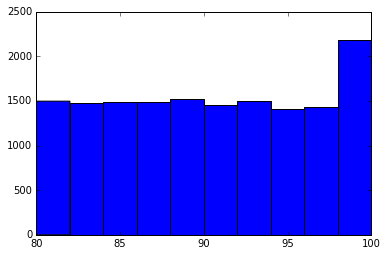

In [11]:
plt.hist(getListForHistogramAndBoxPlot(df,spark))
plt.show()

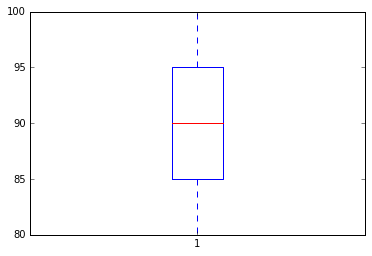

In [12]:
plt.boxplot(getListForHistogramAndBoxPlot(df,spark))
plt.show()

In [13]:
lists = getListsForRunChart(df,spark)

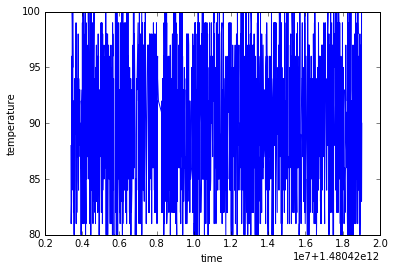

In [14]:
plt.plot(lists[0],lists[1])
plt.xlabel("time")
plt.ylabel("temperature")
plt.show()

# Dimentionality reduction

In [1]:
import ibmos2spark

# @hidden_cell
credentials = {
    'endpoint': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'api_key': 'PUJMZf9PLqN4y-6NUtVlEuq6zFoWhfuecFVMYLBrkxrT',
    'service_id': 'iam-ServiceId-9cd8e66e-3bb4-495a-807a-588692cca4d0',
    'iam_service_endpoint': 'https://iam.bluemix.net/oidc/token'}

configuration_name = 'os_b0f1407510994fd1b793b85137baafb8_configs'
cos = ibmos2spark.CloudObjectStorage(sc, credentials, configuration_name, 'bluemix_cos')

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
# Since JSON data can be semi-structured and contain additional metadata, it is possible that you might face issues with the DataFrame layout.
# Please read the documentation of 'SparkSession.read()' to learn more about the possibilities to adjust the data loading.
# PySpark documentation: http://spark.apache.org/docs/2.0.2/api/python/pyspark.sql.html#pyspark.sql.DataFrameReader.json

df = spark.read.parquet(cos.url('washing.parquet', 'courseradsnew-donotdelete-pr-1hffrnl2pprwut'))
df.createOrReplaceTempView('washing')
df.show()


Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20190827055630-0000
KERNEL_ID = 96ab7acd-9ef1-4411-9147-6d7a614bf04e
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable| 

In [2]:
result = spark.sql("""
SELECT * from (
    SELECT
    min(temperature) over w as min_temperature,
    max(temperature) over w as max_temperature, 
    min(voltage) over w as min_voltage,
    max(voltage) over w as max_voltage,
    min(flowrate) over w as min_flowrate,
    max(flowrate) over w as max_flowrate,
    min(frequency) over w as min_frequency,
    max(frequency) over w as max_frequency,
    min(hardness) over w as min_hardness,
    max(hardness) over w as max_hardness,
    min(speed) over w as min_speed,
    max(speed) over w as max_speed
    FROM washing 
    WINDOW w AS (ORDER BY ts ROWS BETWEEN CURRENT ROW AND 10 FOLLOWING) 
)
WHERE min_temperature is not null 
AND max_temperature is not null
AND min_voltage is not null
AND max_voltage is not null
AND min_flowrate is not null
AND max_flowrate is not null
AND min_frequency is not null
AND max_frequency is not null
AND min_hardness is not null
AND min_speed is not null
AND max_speed is not null   
""")

In [3]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [4]:
type(result)
result.columns

['min_temperature',
 'max_temperature',
 'min_voltage',
 'max_voltage',
 'min_flowrate',
 'max_flowrate',
 'min_frequency',
 'max_frequency',
 'min_hardness',
 'max_hardness',
 'min_speed',
 'max_speed']

## All the requiredd transformation is here and then I just explored more information

In [6]:
assembler = VectorAssembler(inputCols=result.columns, outputCol="features")
features = assembler.transform(result) # this one is pyspark.sql.dataframe or simply data frame
features.rdd.map(lambda row : row.features).take(10)

[DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 71.0, 78.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 78.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 80.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 72.0, 80.0, 1033.0, 1046.0]),
 DenseVector([81.0, 100.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1033.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1033.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 71.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 71.0, 74.0, 73.0, 80.0, 1046.0, 1046.0])]

## now lets play with commands

In [5]:
assembler = VectorAssembler(inputCols=result.columns,outputCol="dense_info")

In [6]:
features = assembler.transform(result)

In [15]:
type(features)

pyspark.sql.dataframe.DataFrame

In [9]:
features.select('dense_info').show()

+--------------------+
|          dense_info|
+--------------------+
|[81.0,100.0,221.0...|
|[81.0,100.0,221.0...|
|[81.0,100.0,221.0...|
|[81.0,100.0,222.0...|
|[81.0,100.0,222.0...|
|[80.0,94.0,222.0,...|
|[80.0,94.0,222.0,...|
|[80.0,94.0,222.0,...|
|[80.0,94.0,222.0,...|
|[80.0,94.0,222.0,...|
|[80.0,84.0,222.0,...|
|[80.0,84.0,222.0,...|
|[80.0,88.0,234.0,...|
|[80.0,88.0,234.0,...|
|[80.0,88.0,234.0,...|
|[80.0,88.0,234.0,...|
|[80.0,88.0,234.0,...|
|[80.0,88.0,234.0,...|
|[81.0,88.0,234.0,...|
|[81.0,88.0,234.0,...|
+--------------------+
only showing top 20 rows



In [8]:
features.rdd.map(lambda row : row.dense_info).take(10)

[DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 71.0, 78.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 78.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 80.0, 1033.0, 1033.0]),
 DenseVector([81.0, 100.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 72.0, 80.0, 1033.0, 1046.0]),
 DenseVector([81.0, 100.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1033.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 223.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1033.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 68.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 71.0, 74.0, 73.0, 80.0, 1046.0, 1046.0]),
 DenseVector([80.0, 94.0, 222.0, 236.0, 11.0, 11.0, 71.0, 74.0, 73.0, 80.0, 1046.0, 1046.0])]

In [18]:
pca = PCA(k=3, inputCol='dense_info', outputCol="pcaFeatures")
model = pca.fit(features)

In [20]:
result_and_inputs= model.transform(features)
result_pca = model.transform(features).select("pcaFeatures")



In [22]:
result_and_inputs.select('dense_info','pcaFeatures').show()

+--------------------+--------------------+
|          dense_info|         pcaFeatures|
+--------------------+--------------------+
|[81.0,100.0,221.0...|[1459.97897058141...|
|[81.0,100.0,221.0...|[1459.99548182867...|
|[81.0,100.0,221.0...|[1460.08958435612...|
|[81.0,100.0,222.0...|[1469.69939294195...|
|[81.0,100.0,222.0...|[1469.71590418921...|
|[80.0,94.0,222.0,...|[1469.71283173387...|
|[80.0,94.0,222.0,...|[1478.35302645729...|
|[80.0,94.0,222.0,...|[1478.35302645729...|
|[80.0,94.0,222.0,...|[1478.36860361381...|
|[80.0,94.0,222.0,...|[1478.36860361381...|
|[80.0,84.0,222.0,...|[1483.54120276840...|
|[80.0,84.0,222.0,...|[1483.51710902233...|
|[80.0,88.0,234.0,...|[1483.42242685429...|
|[80.0,88.0,234.0,...|[1483.42242685429...|
|[80.0,88.0,234.0,...|[1488.10307354727...|
|[80.0,88.0,234.0,...|[1488.10769268496...|
|[80.0,88.0,234.0,...|[1488.01359015751...|
|[80.0,88.0,234.0,...|[1488.02637455661...|
|[81.0,88.0,234.0,...|[1465.16447384470...|
|[81.0,88.0,234.0,...|[1465.1644

In [24]:
result_pca.show(truncate=False)

+-----------------------------------------------------------+
|pcaFeatures                                                |
+-----------------------------------------------------------+
|[1459.9789705814187,-18.745237781780922,70.78430794796873] |
|[1459.995481828676,-19.11343146165273,70.72738871425986]   |
|[1460.0895843561282,-20.969471062922928,70.75630600322052] |
|[1469.6993929419532,-20.403124647615513,62.013569674880955]|
|[1469.7159041892107,-20.771318327487293,61.95665044117209] |
|[1469.7128317338704,-20.790751117222456,61.896106678330966]|
|[1478.3530264572928,-20.294557029728722,71.67550104809607] |
|[1478.3530264572928,-20.294557029728722,71.67550104809607] |
|[1478.3686036138165,-20.260626897636314,71.63355353606426] |
|[1478.3686036138165,-20.260626897636314,71.63355353606426] |
|[1483.5412027684088,-20.006222577501354,66.82710394284209] |
|[1483.5171090223353,-20.867020421583753,66.86707301954084] |
|[1483.4224268542928,-19.87574823665505,66.93027077913985]  |
|[1483.4

In [25]:
result_pca.rdd.map(lambda row : row.pcaFeatures).take(10)

[DenseVector([1459.979, -18.7452, 70.7843]),
 DenseVector([1459.9955, -19.1134, 70.7274]),
 DenseVector([1460.0896, -20.9695, 70.7563]),
 DenseVector([1469.6994, -20.4031, 62.0136]),
 DenseVector([1469.7159, -20.7713, 61.9567]),
 DenseVector([1469.7128, -20.7908, 61.8961]),
 DenseVector([1478.353, -20.2946, 71.6755]),
 DenseVector([1478.353, -20.2946, 71.6755]),
 DenseVector([1478.3686, -20.2606, 71.6336]),
 DenseVector([1478.3686, -20.2606, 71.6336])]

In [26]:
rdd = result_pca.rdd.sample(False,0.1)

In [27]:
x = result_pca.rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[0]).collect()
y = result_pca.rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[1]).collect()
z = result_pca.rdd.map(lambda a : a.pcaFeatures).map(lambda a : a[2]).collect()


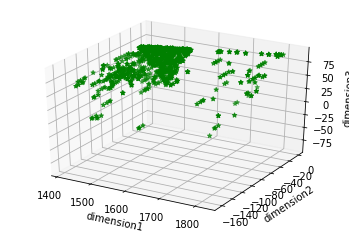

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')




ax.scatter(x,y,z, c='g', marker='*')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()


In [145]:
type(assembler)
assembler.explainParams()

"inputCols: input column names. (current: ['min_temperature', 'max_temperature', 'min_voltage', 'max_voltage', 'min_flowrate', 'max_flowrate', 'min_frequency', 'max_frequency', 'min_hardness', 'max_hardness', 'min_speed', 'max_speed'])\noutputCol: output column name. (default: VectorAssembler_491796ab14205c4d0506__output, current: features)"

In [151]:
features = assembler.transform(result)

In [156]:
type(features)



AttributeError: 'DataFrame' object has no attribute 'iloc'

In [150]:
features.rdd.take(10)

[Row(min_temperature=81, max_temperature=100, min_voltage=221, max_voltage=223, min_flowrate=11, max_flowrate=11, min_frequency=68, max_frequency=76, min_hardness=71, max_hardness=78, min_speed=1033, max_speed=1033, features=DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 71.0, 78.0, 1033.0, 1033.0])),
 Row(min_temperature=81, max_temperature=100, min_voltage=221, max_voltage=223, min_flowrate=11, max_flowrate=11, min_frequency=68, max_frequency=76, min_hardness=72, max_hardness=78, min_speed=1033, max_speed=1033, features=DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 78.0, 1033.0, 1033.0])),
 Row(min_temperature=81, max_temperature=100, min_voltage=221, max_voltage=223, min_flowrate=11, max_flowrate=11, min_frequency=68, max_frequency=76, min_hardness=72, max_hardness=80, min_speed=1033, max_speed=1033, features=DenseVector([81.0, 100.0, 221.0, 223.0, 11.0, 11.0, 68.0, 76.0, 72.0, 80.0, 1033.0, 1033.0])),
 Row(min_temperature=81, max_temperature

In [ ]:
features_rdd = features.rdd.map(lambda row : row.feature )

Congratulations, you are done! Please download the notebook as python file, name it assignment4.1.py and submit it to the grader.